# Plotting multiple sequences

This snippet shows you how to plot a number of sequences as one combined event plot.

## Simple example
Let's first start by importing what we are going to need:

In [1]:
from thebeat.core import Sequence, Stimulus, StimSequence
from thebeat.visualization import plot_multiple_sequences
import numpy as np

# Additionally suppress warnings to avoid confusion
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

---

We start by creating two dummy sequences:

In [2]:
# This is for reproducible randomness (so you will get the same sequences as me)
rng = np.random.default_rng(seed=123)

# Create sequences
seq_isoc = Sequence.generate_isochronous(n=8, ioi=500)
seq_random = Sequence.generate_random_normal(n=8, mu=500, sigma=100, rng=rng)

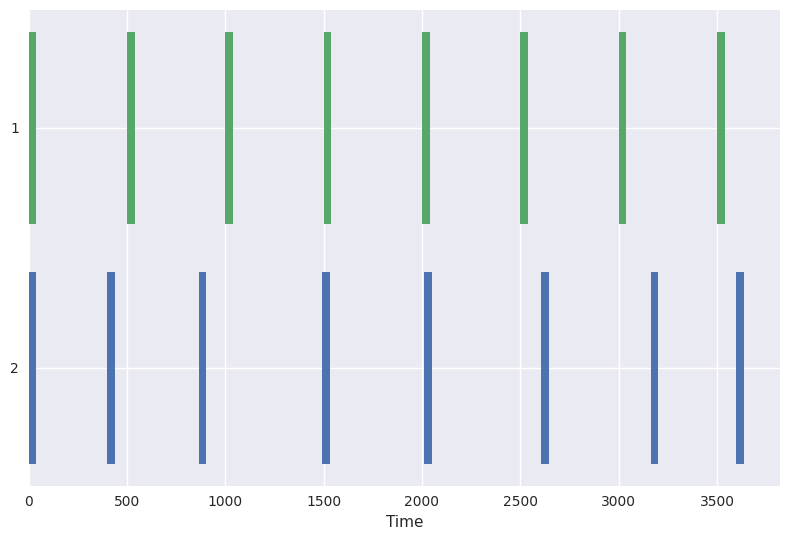

In [3]:
seqs = [seq_isoc, seq_random]
plot_multiple_sequences(seqs);

## Complex example
In this example we generate 10 sequences with random inter-onset intervals (IOIs), each containing 5 events
that also have random event durations.

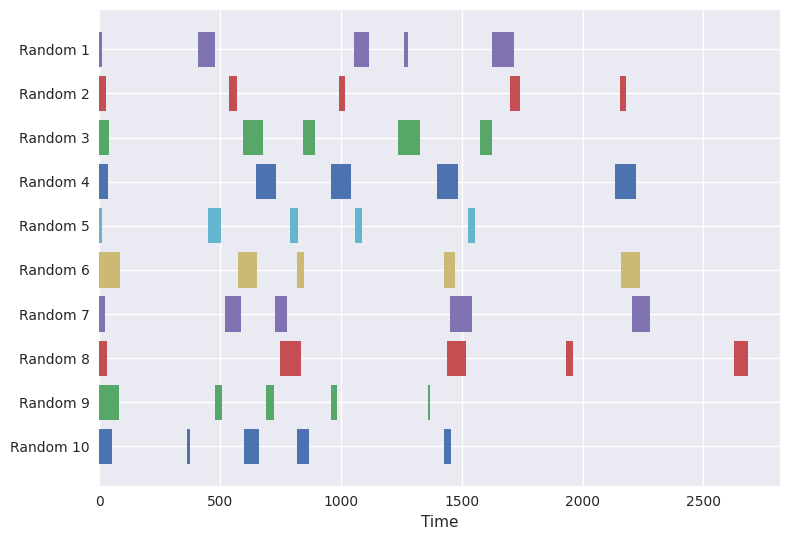

In [4]:
# For reproducible randomness
rng = np.random.default_rng(seed=123)

# Generate random sequences using
seqs = [Sequence.generate_random_uniform(n=5, a=200, b=800) for _ in range(10)]

# Create empty list that we will fill with StimSequence objects
stimseqs = []

# Loop over the sequences
for seq in seqs:
    # Generate 5 events with random durations
    stims = [Stimulus.generate(duration_ms=x) for x in rng.integers(low=10, high=100, size=5)]
    # Create a StimSequence and add to stimseqs list
    stimseqs.append(StimSequence(stims, seq))

# Additionally give them names
sequence_names = [f"Random {i+1}" for i in range(len(stimseqs))]

# Now plot!!
plot_multiple_sequences(stimseqs, sequence_labels=sequence_names);


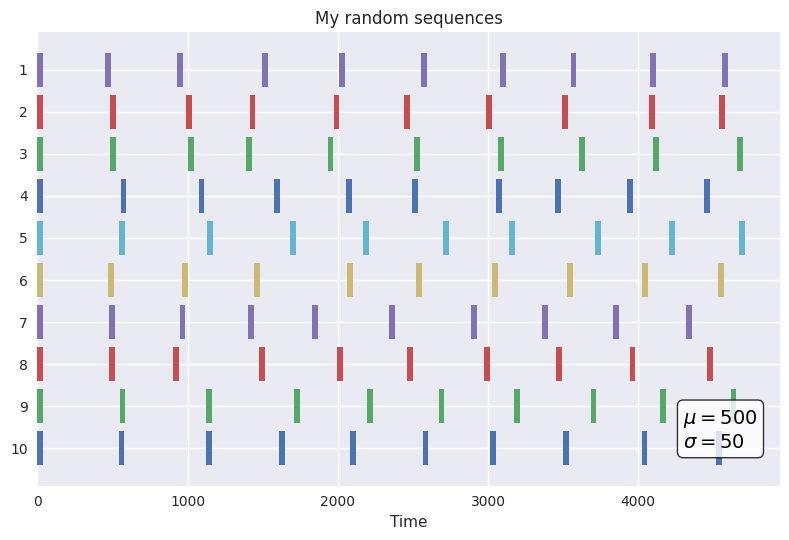

In [5]:
import matplotlib.pyplot as plt

# Generate random sequences (use a generator with a seed so you get the same results as we)
rng = np.random.default_rng(seed=123)
seqs = [Sequence.generate_random_normal(n=10, mu=500, sigma=50, rng=rng) for _ in range(10)]

# Use the Sequence.plot() method
fig, ax = plot_multiple_sequences(seqs,
                                  title='My random sequences',
                                  suppress_display=True)

# Add in some text with a box around it
box_properties = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax.text(4300, 0.01, s="$\mu = 500$\n$\sigma = 50$", bbox=box_properties, fontsize=14)

# Show
fig.show();